<a href="https://colab.research.google.com/github/amankappooresabu/Solubility_predicting_model/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python ML project**

## **Load data**

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
print(df)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]


## **Data Preparation**

### **Data separation as X and Y**

In [4]:
y = df['logS']
print(y)

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64


In [6]:
x = df.drop('logS', axis = 1)
print(x)


      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
0     2.59540  167.850                0.0            0.000000
1     2.37650  133.405                0.0            0.000000
2     2.59380  167.850                1.0            0.000000
3     2.02890  133.405                1.0            0.000000
4     2.91890  187.375                1.0            0.000000
...       ...      ...                ...                 ...
1139  1.98820  287.343                8.0            0.000000
1140  3.42130  286.114                2.0            0.333333
1141  3.60960  308.333                4.0            0.695652
1142  2.56214  354.815                3.0            0.521739
1143  2.02164  179.219                1.0            0.461538

[1144 rows x 4 columns]


### Dara splitting

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state= 100)
print(x_train)


      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
1131  2.43100  430.934                6.0            0.000000
1     2.37650  133.405                0.0            0.000000
45    3.21160  235.906                0.0            0.750000
639   3.92420  333.266                6.0            0.260870
446   1.57760  129.384                0.0            0.000000
...       ...      ...                ...                 ...
1103 -0.62838  126.115                0.0            0.666667
844   1.57722  107.156                0.0            0.750000
810   0.17930   74.079                0.0            0.000000
784   3.10250  191.455                0.0            0.750000
617   3.27740  168.239                2.0            0.923077

[915 rows x 4 columns]


# Model Building

## Linear regression

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)


array([-0.57201469, -4.19773586, -1.16944073, -3.94105933, -4.84675076,
       -2.55989374, -2.41495361, -1.8800624 , -1.80231141, -0.46876619,
        0.69337757, -4.66200202,  1.8416135 , -4.09627043, -2.24621284,
       -4.67989506, -4.61697428, -3.74045055, -1.77967213,  2.18499732,
       -7.19256911,  0.68108481, -2.43799852, -2.09544716, -4.69613453,
       -5.35277571, -3.15852848, -8.11465199, -1.45528015, -0.39758098,
       -2.83288981, -2.30997556, -2.32468712, -2.10554637, -3.56633233,
       -4.30234399, -0.79117404, -1.84562614, -4.69283998, -2.13534246,
       -2.66203321, -4.50777522, -2.05409538, -1.77405627, -1.63452079,
       -0.33408096, -3.84363343, -2.3358091 , -6.49180512, -2.37093758,
       -3.41944015, -2.24891644, -1.67889294, -1.63031317, -7.64828601,
       -1.47500863, -3.2533668 ,  1.27461465, -1.68510343, -5.47827638,
       -5.5488332 , -4.8959987 , -4.36623206, -2.29966411, -4.70095234,
       -2.60024005, -2.65253596, -3.89371534, -4.30950695, -6.11

## Evaluating data performance

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_lr_train_pred,y_train)
lr_train_r2 = r2_score(y_lr_train_pred,y_train)

lr_test_mse = mean_squared_error(y_lr_test_pred,y_test)
lr_test_r2 = r2_score(y_lr_test_pred,y_test)

In [25]:
lr_results = pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.971722,0.717501,1.168611,0.683591


## Plotting

Text(0.5, 1.0, 'Experimental vs Predicted')

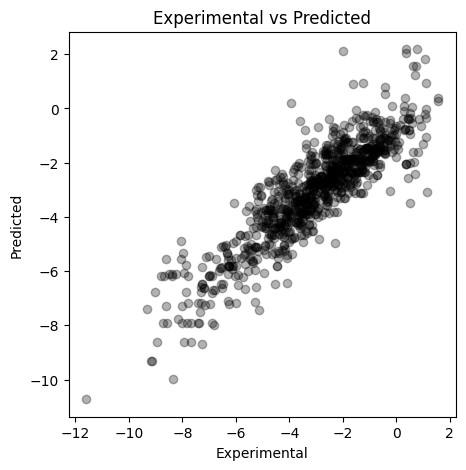

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (5,5))
plt.scatter(x = y_train,y = y_lr_train_pred,c = 'black',alpha = 0.3)

plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.title('Experimental vs Predicted')